In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [ ]:
from matplotlib import style,rcParams
style.use('seaborn-white')
rcParams['figure.figsize'] = 10,5
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
#from scikitplot.metrics import plot_confusion_matrix


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv('drive/MyDrive/Colab Notebooks/nlpdata - train.csv')

df = df.drop("aspect", axis=1)

print("Shape of the DataFrame:",df.shape)
df.reset_index(inplace=True,drop=True)
df.head()

Mounted at /content/drive
Shape of the DataFrame: (3801, 2)


,text,label
0,smart delivery dy',2
1,you can increase your stock as most of the tim...,0
2,"the drag the video to the canvas, when you do ...",1
3,would it be possible to give me access to the ...,1
4,i am adjusting that volume and nothing is happ...,0


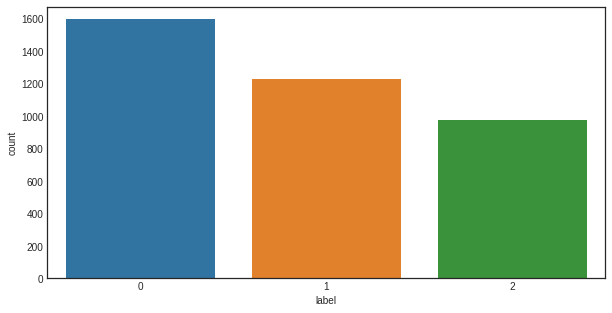

In [ ]:
sns.countplot(df.label)


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

corpus = text_transformation(df['text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)

X = traindata
y = df.label

In [ ]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000],
             'max_depth': [10, None],
             'min_samples_split': [5],
             'min_samples_leaf': [1],
             'bootstrap': [True]}

grid_search = GridSearchCV(RandomForestClassifier(),parameters,cv=5,return_train_score=True,n_jobs=-1)
grid_search.fit(X,y)
grid_search.best_params_

for i in range(6):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.44593713258178297
Rank:  5
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Mean Test Score:  0.4438318694238882
Rank:  7
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.4459350577494986
Rank:  6
Parameters:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000}
Mean Test Score:  0.44330555363441454
Rank:  8
Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Mean Test Score:  0.6479825714088111
Rank:  1
Parameters:  {'bootstrap': True, 'max_depth': None, 'm

In [ ]:
rfc = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])

rfc.fit(X,y)

RandomForestClassifier(min_samples_split=5, n_estimators=500)

In [ ]:
import csv
rows=[]
def expression_check(input, prediction_input):
    if prediction_input[1] == 0:
        out = "Input statement has Negative Sentiment."
    elif prediction_input[1] == 1:
        out= "Input statement has Neutral Sentiment."
    elif prediction_input[1] == 2:
        out ="Input statement has Positive Sentiment."
    else:
        out= "Invalid Statement."

    filename = "output.csv"

    row= [input, out]
    rows.append(row)

    with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
      csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
      csvwriter.writerow(rows) 

In [ ]:
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    #print(prediction[0])
    #print(input[0])
    expression_check(input, prediction)

In [ ]:
test_df = pd.read_csv('drive/MyDrive/Colab Notebooks/nlpdata - test.csv')
test_df = test_df.drop("aspect", axis=1)

from csv import reader
'''
with open('nlp_test.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        sentiment_predictor(row)
'''
for x in test_df.iterrows():
  print (x)
  sentiment_predictor(x)


(0, text     can you check whether its cancelled completely?
label                                                  1
Name: 0, dtype: object)
(1, text     cannot rely on both milk delivery and grocery ...
label                                                    0
Name: 1, dtype: object)
(2, text     I get no notification, however the app is real...
label                                                    0
Name: 2, dtype: object)
(3, text     Love this app, but would love it even more if ...
label                                                    1
Name: 3, dtype: object)
(4, text     it does not let me load a clip on the scene
label                                              0
Name: 4, dtype: object)
(5, text     i love notion as a tool, but the mobile just t...
label                                                    2
Name: 5, dtype: object)
(6, text     unlimited yearly at $216/year
label                                1
Name: 6, dtype: object)
(7, text     some times missing to

In [ ]:


test_df = pd.read_csv('drive/MyDrive/Colab Notebooks/nlpdata - test.csv')

test_df = test_df.drop("aspect", axis=1)

X_test,y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
#test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)


In [ ]:

rcParams['figure.figsize'] = 10,5
#plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
#pre_score = precision_score(y_test,predictions)
#rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
#print('Precision_score: ',pre_score)
#print('Recall_score: ',rec_score)
print('-------------------------------------------------------------------')
cr = classification_report(y_test,predictions)
print(cr)


Accuracy_score:  0.6633165829145728
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.76      0.73        85
           1       0.71      0.59      0.64        66
           2       0.56      0.58      0.57        48

    accuracy                           0.66       199
   macro avg       0.65      0.65      0.65       199
weighted avg       0.67      0.66      0.66       199

